In [548]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import comb

# Генерация выборки

In [549]:
N = 25
sample = np.random.exponential(scale=1.0, size=N)
print(sample)

[4.44203752e-01 7.63302793e-01 2.30131188e-02 1.05594454e-01
 1.88854492e-01 3.75901980e+00 3.56801463e+00 2.56511126e+00
 2.56543224e+00 9.96845497e-01 9.84403215e-01 9.63934476e-02
 3.96750775e-01 3.06790990e+00 1.12010365e-01 2.50786112e+00
 6.02816444e-01 9.83202543e-01 2.41519373e-01 3.54469604e-01
 2.25378613e+00 2.45114345e+00 1.07645898e+00 3.03735222e+00
 1.90129180e-03]


## Определение статистик

### Мода

In [550]:
values, counts = np.unique(sample, return_counts=True)
mode = values[counts == counts.max()]

### Медиана

In [551]:
median = np.median(sample)

### Размах

In [552]:
sample_range = np.ptp(sample) # max - min

### Коэффицент асимметрии

In [553]:
mean = sum(sample) / N

## Считаем 3-й момент и 2-й момент
m3 = sum((x - mean)**3 for x in sample) / N
m2 = sum((x - mean)**2 for x in sample) / N

skewness = m3 / (m2 ** 1.5)

In [554]:
print(f"Выборка (N=25): \n{sample}\n")
print(f"--- Результаты анализа ---")
print(f"Мода: {mode}")
print(f"Медиана: {median:.4f}")
print(f"Размах: {sample_range:.4f}")
print(f"Коэффициент асимметрии: {skewness:.4f}")

Выборка (N=25): 
[4.44203752e-01 7.63302793e-01 2.30131188e-02 1.05594454e-01
 1.88854492e-01 3.75901980e+00 3.56801463e+00 2.56511126e+00
 2.56543224e+00 9.96845497e-01 9.84403215e-01 9.63934476e-02
 3.96750775e-01 3.06790990e+00 1.12010365e-01 2.50786112e+00
 6.02816444e-01 9.83202543e-01 2.41519373e-01 3.54469604e-01
 2.25378613e+00 2.45114345e+00 1.07645898e+00 3.03735222e+00
 1.90129180e-03]

--- Результаты анализа ---
Мода: [1.90129180e-03 2.30131188e-02 9.63934476e-02 1.05594454e-01
 1.12010365e-01 1.88854492e-01 2.41519373e-01 3.54469604e-01
 3.96750775e-01 4.44203752e-01 6.02816444e-01 7.63302793e-01
 9.83202543e-01 9.84403215e-01 9.96845497e-01 1.07645898e+00
 2.25378613e+00 2.45114345e+00 2.50786112e+00 2.56511126e+00
 2.56543224e+00 3.03735222e+00 3.06790990e+00 3.56801463e+00
 3.75901980e+00]
Медиана: 0.9832
Размах: 3.7571
Коэффициент асимметрии: 0.6003


## Визуализация
### Эмпирическая функция распределения

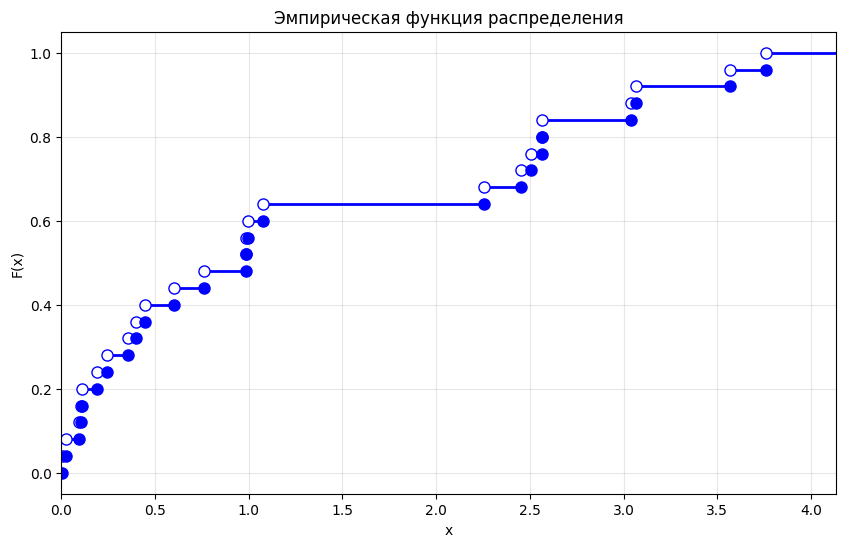

In [555]:
sample_sorted = np.sort(sample)
emperical_distribution = np.arange(0, N) / N

plt.figure(figsize=(10, 6))

for i in range(N):
    if i == 0:
        left = 0
    else:
        left = sample_sorted[i-1]
        
    right = sample_sorted[i]
    y = emperical_distribution[i]
    
    plt.hlines(y, left, right, colors='blue', linewidth=2)
    
    if i!= 0:
        plt.plot(left, y, marker='o', markerfacecolor='white', markeredgecolor='blue', markersize=8)
    
    plt.plot(right, y, marker='o', color='blue', markersize=8)

plt.hlines(1, sample_sorted[N-1], sample_sorted[N-1] + 0.5, colors='blue', linewidth=2)
plt.plot(sample_sorted[N-1], 1, marker='o', markerfacecolor='white', markeredgecolor='blue', markersize=8)

plt.xlabel("x")
plt.ylabel("F(x)")
plt.title("Эмпирическая функция распределения")
plt.grid(True, alpha=0.3)
plt.xlim(0, max(sample_sorted) * 1.1)
plt.ylim(-0.05, 1.05)
plt.show()

### Гистограмма

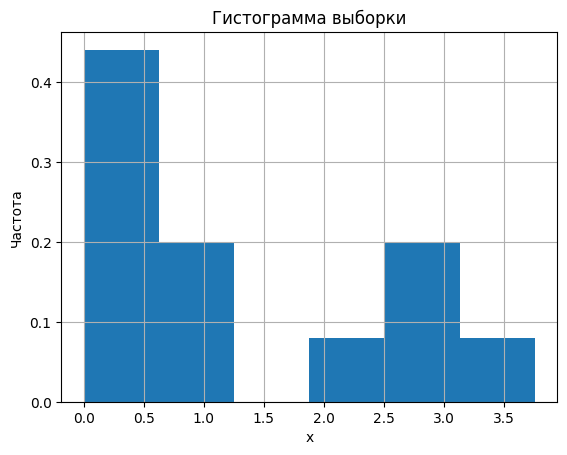

In [556]:
k = int(np.ceil(np.log2(N) + 1))
weights = np.ones_like(sample) / len(sample)

plt.figure()
plt.hist(sample, bins=k, weights=weights)
plt.xlabel("x")
plt.ylabel("Частота")
plt.title("Гистограмма выборки")
plt.grid(True)
plt.show()

### Boxplot

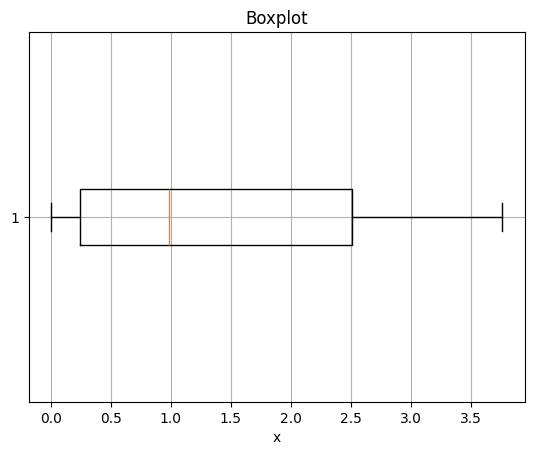

Q1 = 0.2415193730353664
Median = 0.9832025427212934
Q3 = 2.507861119902702
IQR = 2.2663417468673357
Whisker low = 0.0019012917997558536
Whisker high = 3.759019795176598
Outliers = []


In [557]:
Q1 = np.percentile(sample, 25)
Q2 = np.percentile(sample, 50)
Q3 = np.percentile(sample, 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбросы
outliers = sample[(sample < lower_bound) | (sample > upper_bound)]

outliers_low = sample[sample < lower_bound]
outliers_high = sample[sample > upper_bound]

if len(outliers_low) > 0:
    whisker_low = lower_bound
else:
    whisker_low = np.min(sample)
        
if len(outliers_high) > 0:
    whisker_high = upper_bound
else:
    whisker_high = np.max(sample)


plt.figure()
plt.boxplot(sample, vert=False)
plt.title("Boxplot")
plt.xlabel("x")
plt.grid(True)
plt.show()

print("Q1 =", Q1)
print("Median =", Q2)
print("Q3 =", Q3)
print("IQR =", IQR)
print("Whisker low =", whisker_low)
print("Whisker high =", whisker_high)
print("Outliers =", outliers)

## Сравнение плотностей распределения

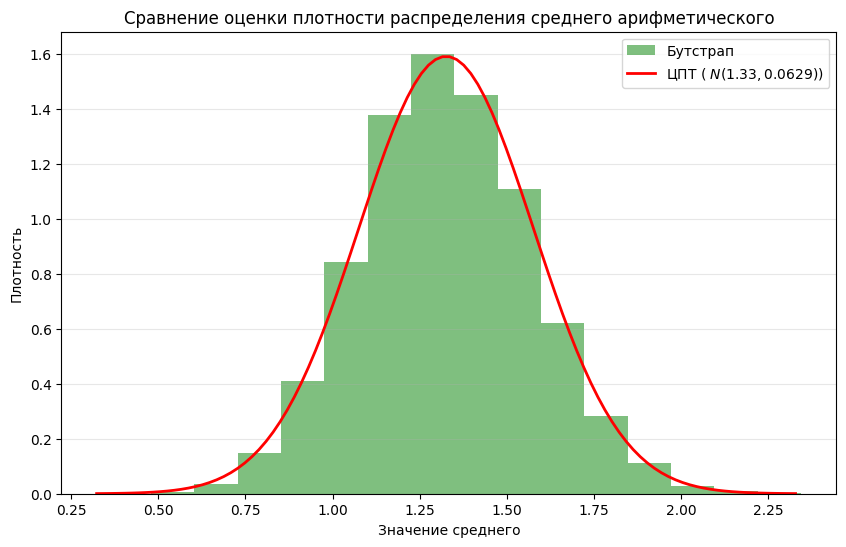

In [558]:
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

# 2. Оценка по ЦПТ
clt_mean = sample_mean
clt_std = sample_std / np.sqrt(N)
x_axis = np.linspace(sample_mean - 4*clt_std, sample_mean + 4*clt_std, 100)
clt_pdf = norm.pdf(x_axis, clt_mean, clt_std)

# 3. Бутстраповская оценка
n_bootstrap = 10000
bootstrap_means = []
for _ in range(n_bootstrap):
    resample = np.random.choice(sample, size=N, replace=True)
    bootstrap_means.append(np.mean(resample))

bootstrap_means = np.array(bootstrap_means)

# 4. Визуализация и сравнение
plt.figure(figsize=(10, 6))

# Гистограмма бутстрапа
k = int(np.ceil(np.log2(n_bootstrap) + 1))
plt.hist(bootstrap_means, bins=k, density=True, alpha=0.5, 
         color='green', label='Бутстрап')

# Кривая ЦПТ (нормальное распределение)
plt.plot(x_axis, clt_pdf, 'r-', lw=2, label=f'ЦПТ ( $N({clt_mean:.2f}, {clt_std**2:.4f})$)')

plt.title('Сравнение оценки плотности распределения среднего арифметического')
plt.xlabel('Значение среднего')
plt.ylabel('Плотность')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## Бутстраповская оценка коэффицента асимметрии

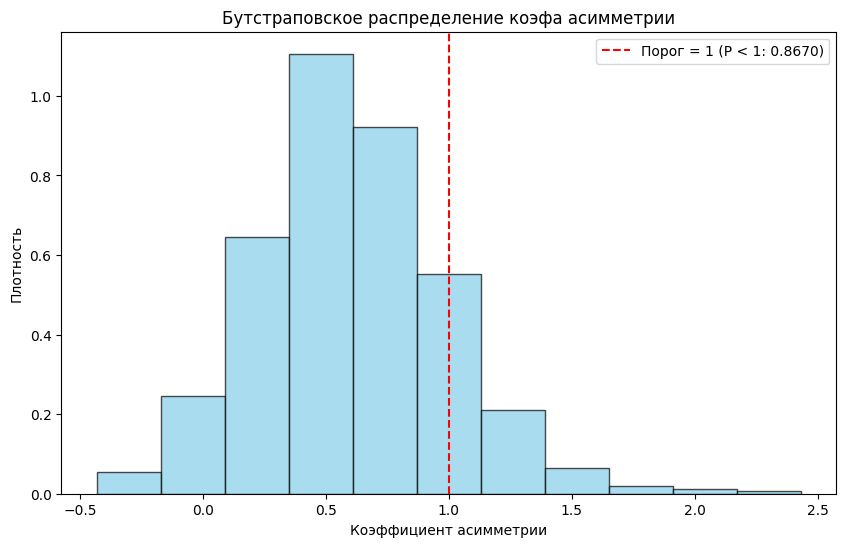

In [559]:
n_bootstrap = 1000
bootstrap_skews = []

for _ in range(n_bootstrap):
    resample = np.random.choice(sample, size=N, replace=True)
    mean = sum(resample) / N

    m3 = sum((x - mean)**3 for x in resample) / N
    m2 = sum((x - mean)**2 for x in resample) / N

    skewness = m3 / (m2 ** 1.5)
    bootstrap_skews.append(skewness)

bootstrap_skews = np.array(bootstrap_skews)

# Оценка вероятности того, что асимметрия < 1(с помщью эмпирической функции распределения)
prob_less_than_1 = np.mean(bootstrap_skews < 1)

# Визуализация
plt.figure(figsize=(10, 6))

k = int(np.ceil(np.log2(n_bootstrap) + 1))
plt.hist(bootstrap_skews, bins=k, density=True, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(1, color='red', linestyle='--', label=f'Порог = 1 (P < 1: {prob_less_than_1:.4f})')
plt.title('Бутстраповское распределение коэфа асимметрии')
plt.xlabel('Коэффициент асимметрии')
plt.ylabel('Плотность')
plt.legend()
plt.show()

## Сравнение плотности распределения медианы выборки с бутстраповской оценкой

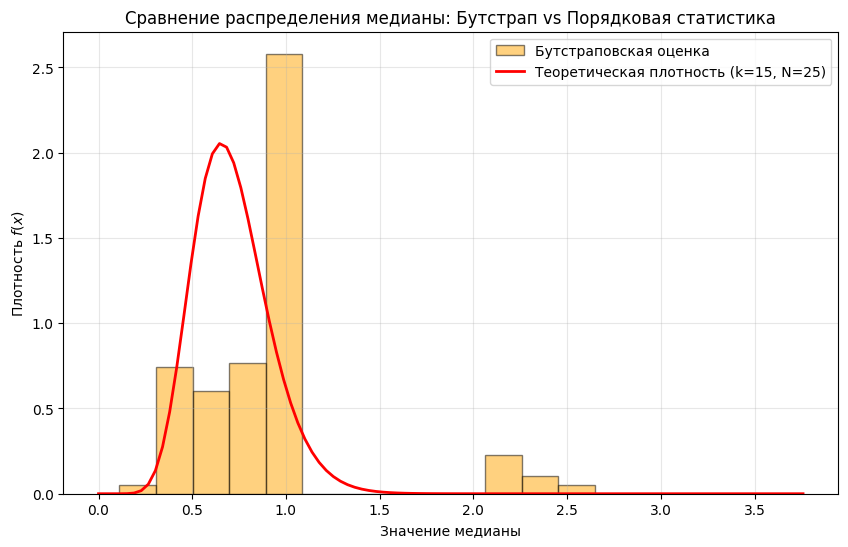

In [561]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# 1. Параметры и данные
N = 25  # Размер выборки
k = 13  # Индекс медианы
n_bootstrap = 10000

# 2. Бутстрап
bootstrap_medians = []
for _ in range(n_bootstrap):
    resample = np.random.choice(sample, size=N, replace=True)
    bootstrap_medians.append(np.median(resample))

bootstrap_medians = np.array(bootstrap_medians)

# 3. Аналитическая плотность k-й статистики
def p(x):
    return np.exp(-x) if x >= 0 else 0

def F(x):
    return 1 - np.exp(-x) if x >= 0 else 0

v_f = np.vectorize(p)
v_F = np.vectorize(F)

# Коэффициент n! / ((k-1)!(n-k)!)
coeff = N * comb(N - 1, k - 1)

x_axis = np.linspace(0, max(sample), 100)
# Формула плотности k-й порядковой статистики
median_pdf_analytical = coeff * (v_F(x_axis)**(k-1)) * ((1 - v_F(x_axis))**(N-k)) * v_f(x_axis)

# 4. Визуализация
plt.figure(figsize=(10, 6))

# Бутстрап
k = int(np.ceil(np.log2(n_bootstrap) + 1))
plt.hist(bootstrap_medians, bins=k, density=True, alpha=0.5, 
         label='Бутстраповская оценка', color='orange', edgecolor='black')

# Теоретическая кривая
plt.plot(x_axis, median_pdf_analytical, 'r-', lw=2, 
         label=f'Теоретическая плотность (k={k}, N={N})')

plt.title("Сравнение распределения медианы: Бутстрап vs Порядковая статистика")
plt.xlabel("Значение медианы")
plt.ylabel("Плотность $f(x)$")
plt.legend()
plt.grid(alpha=0.3)
plt.show()